In [128]:
import pandas as pd
import numpy as np

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, Normalizer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import *
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

from xgboost import XGBRegressor

In [205]:
data = pd.read_csv("data8.csv", sep=",")
data.head()

,Unnamed: 0,Locality,Type of property,Price,Number of rooms,Area,Fully equipped kitchen,Furnished,Open fire,Terrace Area,Garden Area,Surface of the land,Number of facades,Swimming pool,State of the building,Province,Region,PriceperMeter
0,0,2970,apartment,764999.0,2.0,153.0,0.0,0.0,0.0,62.0,0.0,215.0,2.0,0.0,medium,Anvers,Flanders,4999.0
1,1,3200,apartment,294999.0,2.0,80.0,0.0,0.0,0.0,0.0,0.0,80.0,2.0,0.0,medium,Brabant Flamand,Flanders,3687.0
2,2,8211,apartment,233999.0,2.0,90.0,0.0,0.0,0.0,0.0,0.0,90.0,2.0,0.0,medium,Flandre Occidental,Flanders,2599.0
3,3,2630,apartment,329899.0,1.0,87.0,0.0,0.0,0.0,28.0,0.0,115.0,2.0,0.0,medium,Anvers,Flanders,3791.0
4,4,2630,apartment,359899.0,1.0,95.0,0.0,0.0,0.0,47.0,0.0,142.0,4.0,0.0,medium,Anvers,Flanders,3788.0


In [206]:
X = data.drop("Price", axis = 1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=40)

In [97]:
X_maison = data[data["Type of property"] == "house"].drop("Price", axis = 1)
y_maison = data["Price"][data["Type of property"] == "house"]
X_train, X_test, y_train, y_test = train_test_split(X_maison, y_maison, test_size=0.1, random_state=38)

In [115]:
X_appartement = data[data["Type of property"] == "apartment"].drop("Price", axis = 1)
y_appartement = data["Price"][data["Type of property"] == "apartment"]
X_train, X_test, y_train, y_test = train_test_split(X_appartement, y_appartement, test_size=0.1, random_state=35)

In [181]:
numerical_features = ['Locality', 'Area', 'Terrace Area', 'Garden Area', 'Surface of the land']
categorial_features = ['Fully equipped kitchen', 'Furnished', 'Open fire',
                       'Swimming pool', 'State of the building', 'Province', 'Region','Number of facades', 'Number of rooms' ]

In [197]:
numerical_pipeline = make_pipeline(PolynomialFeatures(degree=3), StandardScaler())
categorial_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), 
                                   OneHotEncoder())

In [227]:
preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                       (categorial_pipeline, categorial_features))
bg = BaggingRegressor(base_estimator=XGBRegressor(n_estimators=100, verbosity=2, validate_parameters=True, eta=0.5, max_depth = 7, gamma=13),
                      n_estimators=11, n_jobs=-1, verbose=1)

In [228]:
X = data.drop("Price", axis = 1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=35)

model = make_pipeline(preprocessor,bg)
model.fit(X_train, y_train)
model.score(X_test, y_test)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:  1.6min remaining:  4.8min
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  2.3min finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.7s remaining:    2.3s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.3s finished


0.7642575727748442

In [127]:
import pickle
file_name = "xgb_reg_T2.pkl"

# save
pickle.dump(model, open(file_name, "wb"))


# # load
model = pickle.load(open(file_name, "rb"))
print(model)
# # test
# ind = 1
# test = X_val[ind]
# xgb_model_loaded.predict(test)[0] == xgb_model.predict(test)[0]

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures(degree=3)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Locality', 'Area',
                                                   'Terrace Area',
                                                   'Garden Area',
                                                   'Surface of the land']),
                                                 ('pipeline-2',
                         

In [33]:
model.score(X_test, y_test)

0.7908006557358647

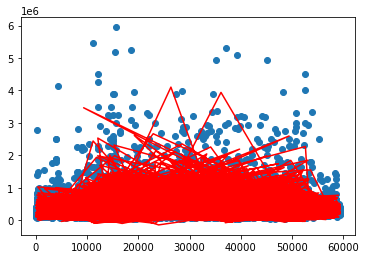

In [464]:
plt.scatter(X_test.index, y_test)
plt.plot(X_test.index, prediction, c="r")


In [138]:
from sklearn.ensemble import RandomForestRegressor

feature_names = [f'feature {i}' for i in range(X_maison.shape[1])]
forest = make_pipeline(preprocessor, RandomForestRegressor(random_state=0))
forest.fit(X_train[:1000], y_train[:1000])

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures(degree=3)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Locality', 'Area',
                                                   'Terrace Area',
                                                   'Garden Area',
                                                   'Surface of the land']),
                                                 ('pipeline-2',
                         

In [139]:
import time
import numpy as np

start_time = time.time()
importances = forest[-1].feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest[-1].estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.028 seconds


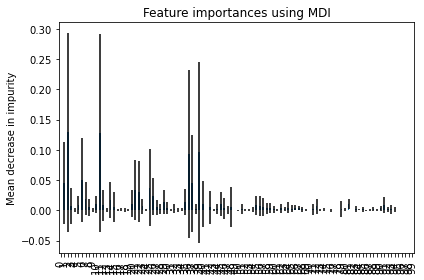

In [140]:
import pandas as pd
forest_importances = pd.Series(importances)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()